# Ni microspectrocopy data from BNL
From TXM beamline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import selector
from selector import energy_point_selector
from importlib import reload

import utils
utils = reload(utils)
from utils import *

np.random.seed(42)

In [5]:
mpl.colors.rgb2hex(plt.cm.Dark2(0))

'#1b9e77'

In [2]:
Ni_xanes = parse_tiff('Data/TXM_XANES/Ni_xanes.tiff')
Ni_energy = np.loadtxt('Data/TXM_XANES/Ni_eng_list.txt')
LiNiO2 = np.loadtxt('Data/TXM_XANES/ref_LiNiO2.txt')
NiO = np.loadtxt('Data/TXM_XANES/ref_NiO.txt')

301


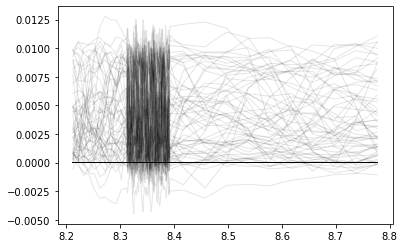

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
c = 0
for i, x in enumerate(Ni_xanes.reshape(-1, len(Ni_energy))):
    if np.average(x) > 0.0001:
        ax.plot(Ni_energy, x, 'k-', lw=1, alpha=0.1)
        c += 1
        if c > 100:
            print(i)
            break

In [4]:
energy = np.linspace(8223, 8776, (8776 - 8223) + 1)

Refs = []
interperlator = interp1d(LiNiO2[:, 0] * 1000, LiNiO2[:, 1])
Refs.append(interperlator(energy))
interperlator = interp1d(NiO[:, 0] * 1000, NiO[:, 1])
Refs.append(interperlator(energy))
Refs = np.array(Refs)

Ni_xanes_tmp = np.zeros((len(energy), Ni_xanes.shape[1], Ni_xanes.shape[2]))
for x in range(Ni_xanes.shape[1]):
    for y in range(Ni_xanes.shape[2]):
        interperlator = interp1d(Ni_energy * 1000, Ni_xanes[:, x, y])
        Ni_xanes_tmp[:, x, y] = interperlator(energy)

Ni_xanes = Ni_xanes_tmp

(554, 320, 320)


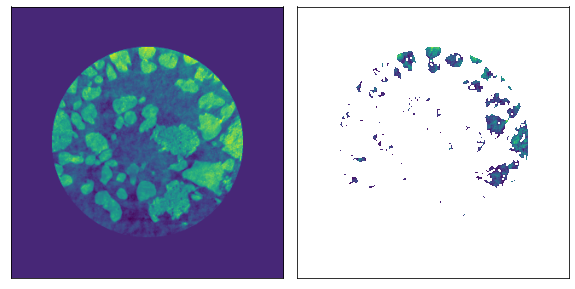

In [5]:
flattened_spectra = Ni_xanes.reshape(-1, len(energy))
filtered_spectra, mask = get_filtered_img(Ni_xanes, threshold=0.01, return_mask=True)
print(filtered_spectra.shape)

fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
plt.subplots_adjust(wspace=0.05)
axes[0].imshow(np.max(Ni_xanes.T, axis=2), aspect='auto')
axes[1].imshow(np.max(filtered_spectra.T, axis=2), aspect='auto')
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])

In [6]:
flattened_data = Ni_xanes.T.reshape(-1, len(energy))
flattened_mask = mask[0, :, :].reshape(-1)
flattened_spectra = np.array([x for i, x in enumerate(flattened_data) if flattened_mask[i] == 0])
pts = np.array([[x, y] for x in range(Ni_xanes.shape[1]) 
                for y in range(Ni_xanes.shape[2]) if mask[0, x, y] == 0])
print(flattened_spectra.shape, pts.shape)

(6426, 554) (6426, 2)


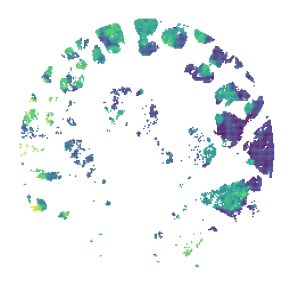

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(pts[:, 0], -pts[:, 1], c=np.max(flattened_spectra, axis=1), cmap=plt.cm.viridis, s=0.3)
ax.axis('off')
plt.show()

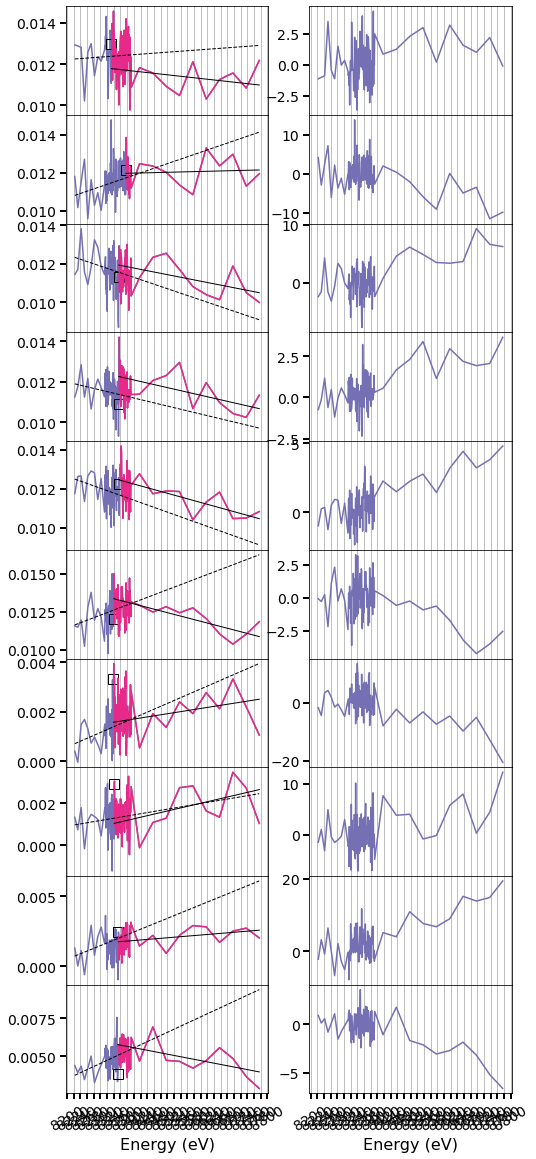

In [8]:
pre_edge, post_edge, whitelines = show_normalization(energy, flattened_spectra, N=10, return_params=True,
                                                     plot=True, pre_edge_offset=1, post_edge_offset=1,
                                                     whiteline_range=-1, colors=[plt.cm.Dark2(i) for i in [2, 3]])

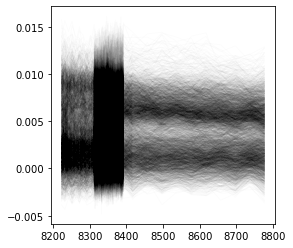

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))
for i, x in enumerate(flattened_spectra):
    ax.plot(energy, x, 'k-', alpha=0.01, lw=1)
    if i == 5000:
        break

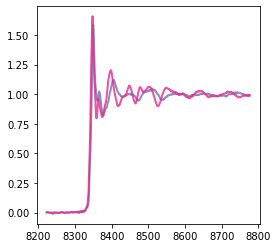

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
for i, r in enumerate(Refs):
    ax.plot(energy, r, '-', c=plt.cm.Dark2(2 + i), alpha=0.8, lw=2)